This code was used to evaluate model performances with K-Fold validation

### Model Validation K-Fold ###

Imports

In [1]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import pandas as pd
import cv2
import os
from pathlib import Path

def import_models(model_dir):
    models = []
    # get list of all the files in the directory
    data_dir = Path(model_dir)
    files_list = list(data_dir.iterdir())

    for file in files_list:
        models.append(f"models/{file.name}")

    print("Models found:")
    for model in models:
        print(model)

    return models

def import_data(data_dir):
    
    labels = ['no', 'yes'] # yes: green electro parking spot # 'no' = 0, 'yes' = 1
    img_size = 250  # Zielgrösse Bilder
    X = []  # Bilddaten
    y = []  # zugehörigen Labels 0 oder 1 
    
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]    # Bild einlesen, in RGB umwandeln 
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Bild auf einheitliche Grösse skalieren
                X.append(resized_arr)
                y.append(class_num)
            except Exception as e:
                print(f"Fehler bei {img}: {e}")
    
    x_array = np.array(X)
    y_array = np.array(y)   

    x_array = x_array / 255.0
    y_array = y_array.astype('float32')

    return x_array, y_array

x_data, y_data = import_data('data')
models_list = import_models('models')

Models found:
models/cnn_optimised_adam.keras
models/cnn_optimised_sgd.keras
models/cnn_v_2.keras


### Model Summaries ###

In [2]:
for model in models_list:
    # model summary
    print(f"Loading model: {model}")
    model = load_model(model)
    model.summary()
    for layer in model.layers:
        if "dropout" in layer.name.lower():
            print(f"{layer.name}: rate = {layer.rate}")

    print(model.optimizer)
    print(model.optimizer.learning_rate.numpy())


Loading model: models/cnn_optimised_adam.keras


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_110 (Conv2D)             │ (None, 250, 250, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_110         │ (None, 250, 250, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_110               │ (None, 125, 125, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_111         │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 62, 62, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_112         │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 31, 31, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_113         │ (None, 31, 31, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 15, 15, 128)    │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_14         │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417,797 (1.59 MB)

 Trainable params: 139,073 (543.25 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 278,148 (1.06 MB)

dropout_60: rate = 0.39255482819938825
dropout_61: rate = 0.29134086400151704
0.0007237024
Loading model: models/cnn_optimised_sgd.keras


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 250, 250, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 250, 250, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 125, 125, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 125, 125, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 62, 62, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 62, 62, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_5          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,907 (859.02 KB)

 Trainable params: 219,329 (856.75 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 2 (12.00 B)

dropout_22: rate = 0.4164309871962869
dropout_23: rate = 0.250400851772693
0.00013925477
Loading model: models/cnn_v_2.keras


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,461 (1.26 MB)

 Trainable params: 110,337 (431.00 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 220,676 (862.02 KB)

dropout: rate = 0.4
dropout_1: rate = 0.3
1e-04


### Evaluate the Models with K-Fold ###

In [3]:
# Parameters
np.random.seed(41) # For reproducibility
n_iterations = 10 # Number of K-fold iterations
samples_per_class = 50 # test with 50 yes and 50 no
all_results = {} # To store results for all models

# Get indices for each class
idx_yes = np.where(y_data == 1)[0]
idx_no = np.where(y_data == 0)[0]



for model_name in models_list:
    print(f"\n🔍 Evaluating model: {model_name}")
    model = load_model(model_name)

    # To store metrics per iteration
    accuracy_scores = []
    f1_scores = []

    for i in range(n_iterations):

        # Sample balanced subset
        selected_yes = np.random.choice(idx_yes, size=samples_per_class, replace=False)
        selected_no = np.random.choice(idx_no, size=samples_per_class, replace=False)
        selected_indices = np.concatenate([selected_yes, selected_no])
        np.random.shuffle(selected_indices)

        x_sample, y_sample = x_data[selected_indices], y_data[selected_indices]
        predictions = model.predict(x_sample)
        pred_labels = (predictions > 0.5).astype("int32").reshape(-1)

        # Compute metrics
        acc = accuracy_score(y_sample, pred_labels)
        f1 = f1_score(y_sample, pred_labels)

        accuracy_scores.append(acc)
        f1_scores.append(f1)

        print(f"Run {i+1}: Accuracy = {acc:.3f}, F1 = {f1:.3f}")

    # Store results
    all_results[model_name] = {
        "accuracy": accuracy_scores,
        "f1": f1_scores
    }



🔍 Evaluating model: models/cnn_optimised_adam.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step
Run 1: Accuracy = 0.980, F1 = 0.980
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Run 2: Accuracy = 0.970, F1 = 0.970
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Run 3: Accuracy = 0.950, F1 = 0.950
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Run 4: Accuracy = 0.970, F1 = 0.970
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
Run 5: Accuracy = 0.980, F1 = 0.980
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
Run 6: Accuracy = 1.000, F1 = 1.000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Run 7: Accuracy = 0.970, F1 = 0.970
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
Run 8: Accuracy = 0.990, F1 = 0.990
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step
Run 9: Accuracy = 0.990, F1 = 0.990
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
Run 10: Accuracy = 0.980, F1 = 0.980

🔍 Evaluating model: models/cnn_optimised_sgd.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step
Run 1: Accuracy = 0.960, F1 = 0.961
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step
Run 2: Accuracy = 0.980, F1 = 

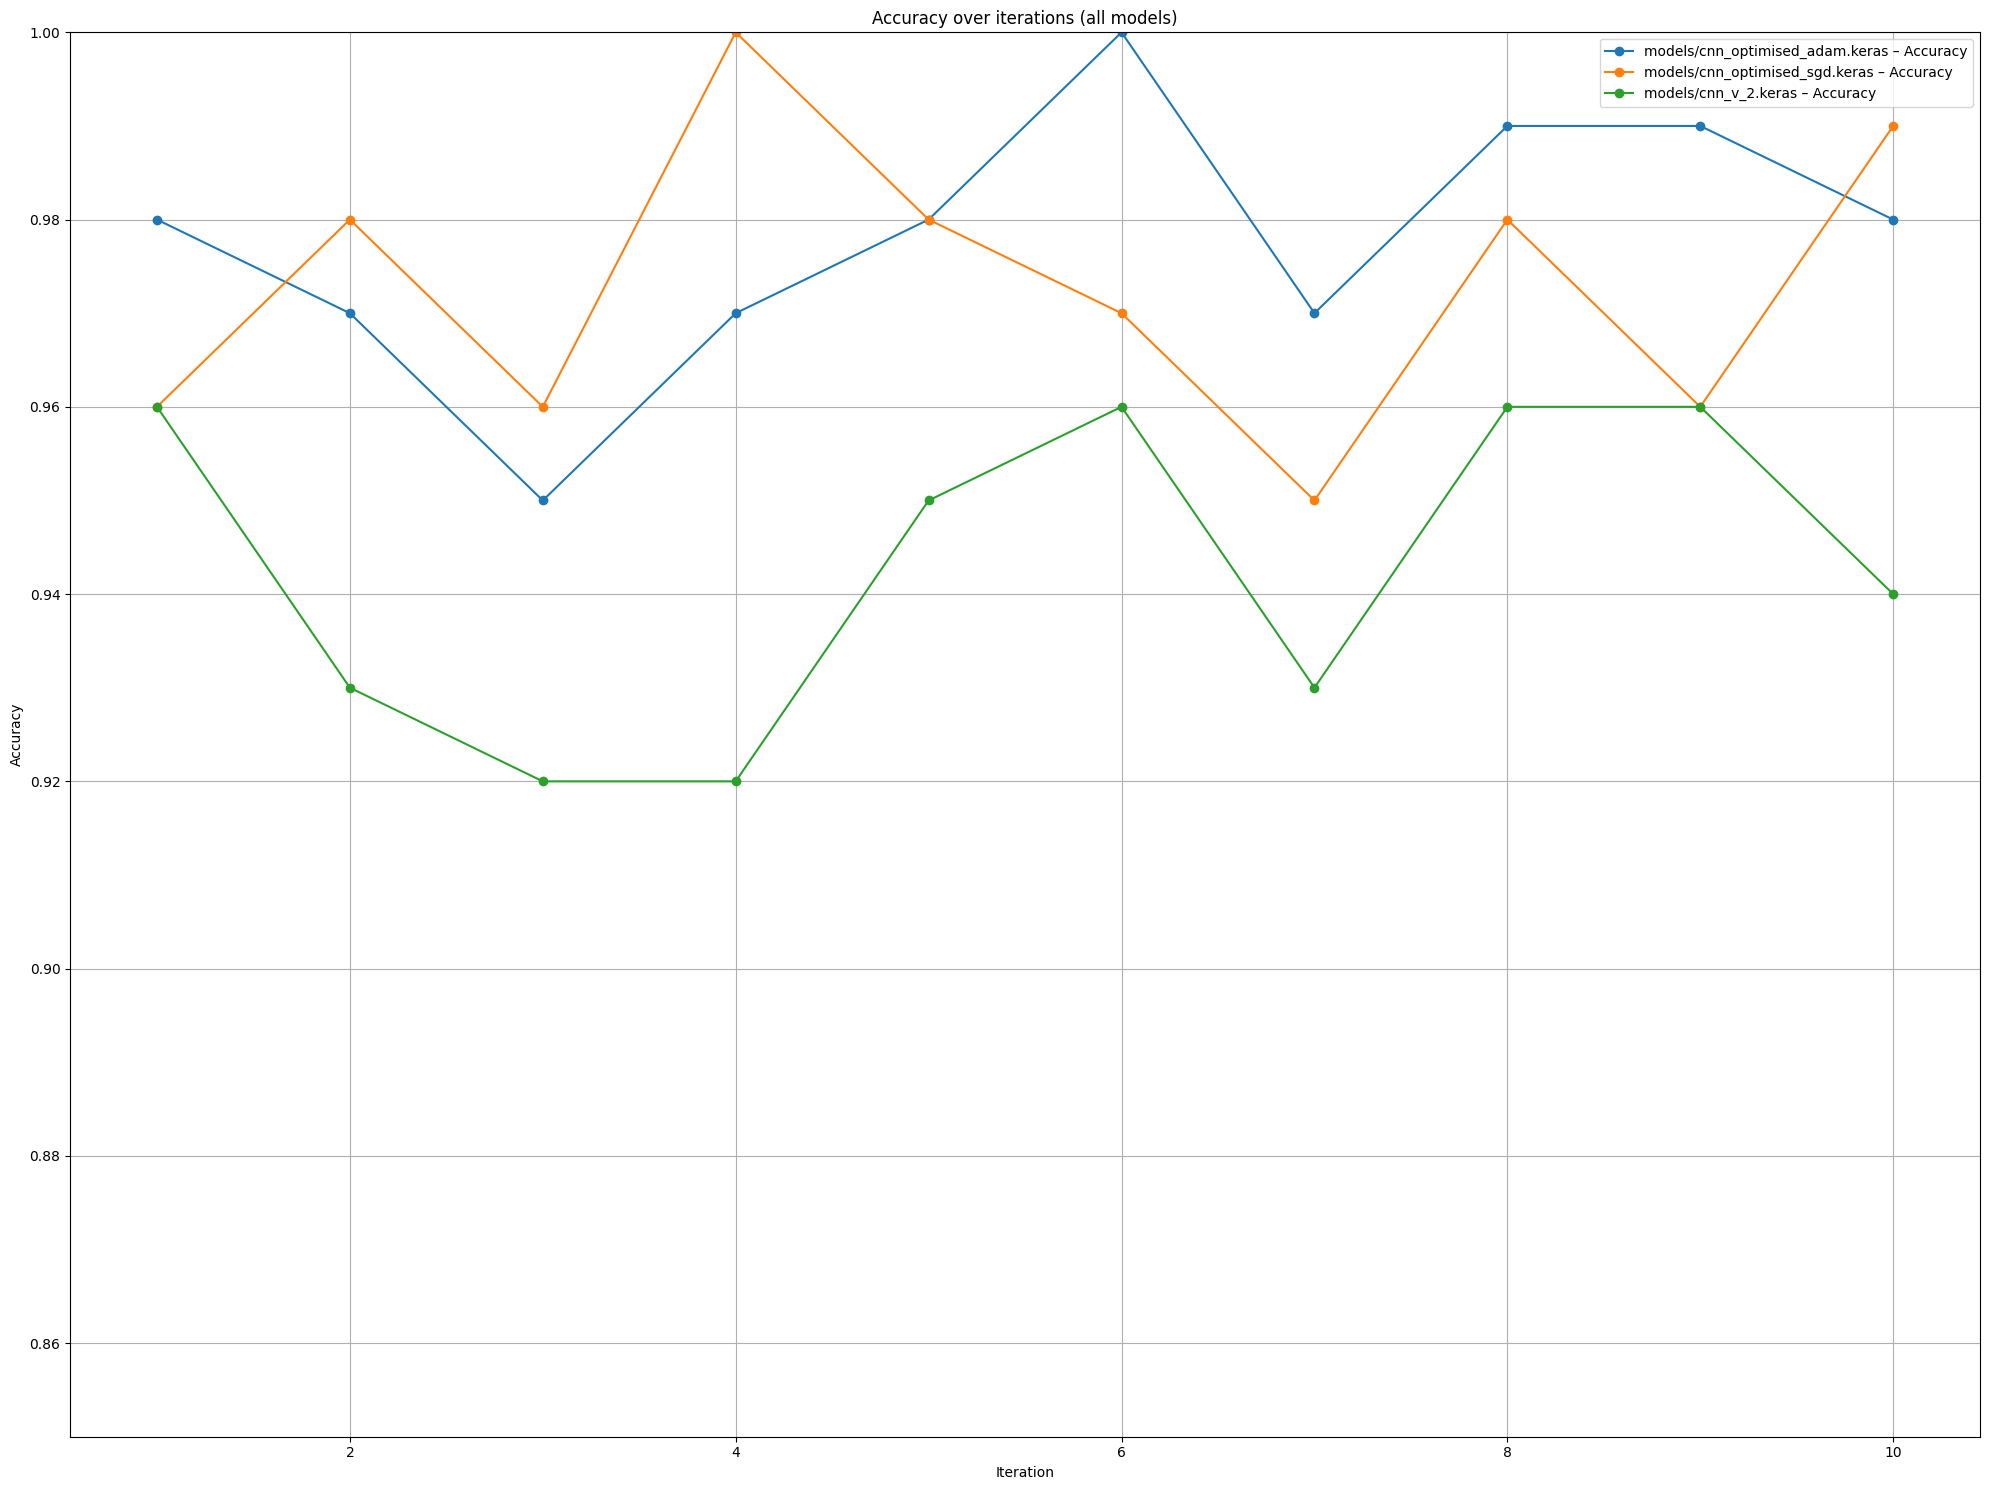

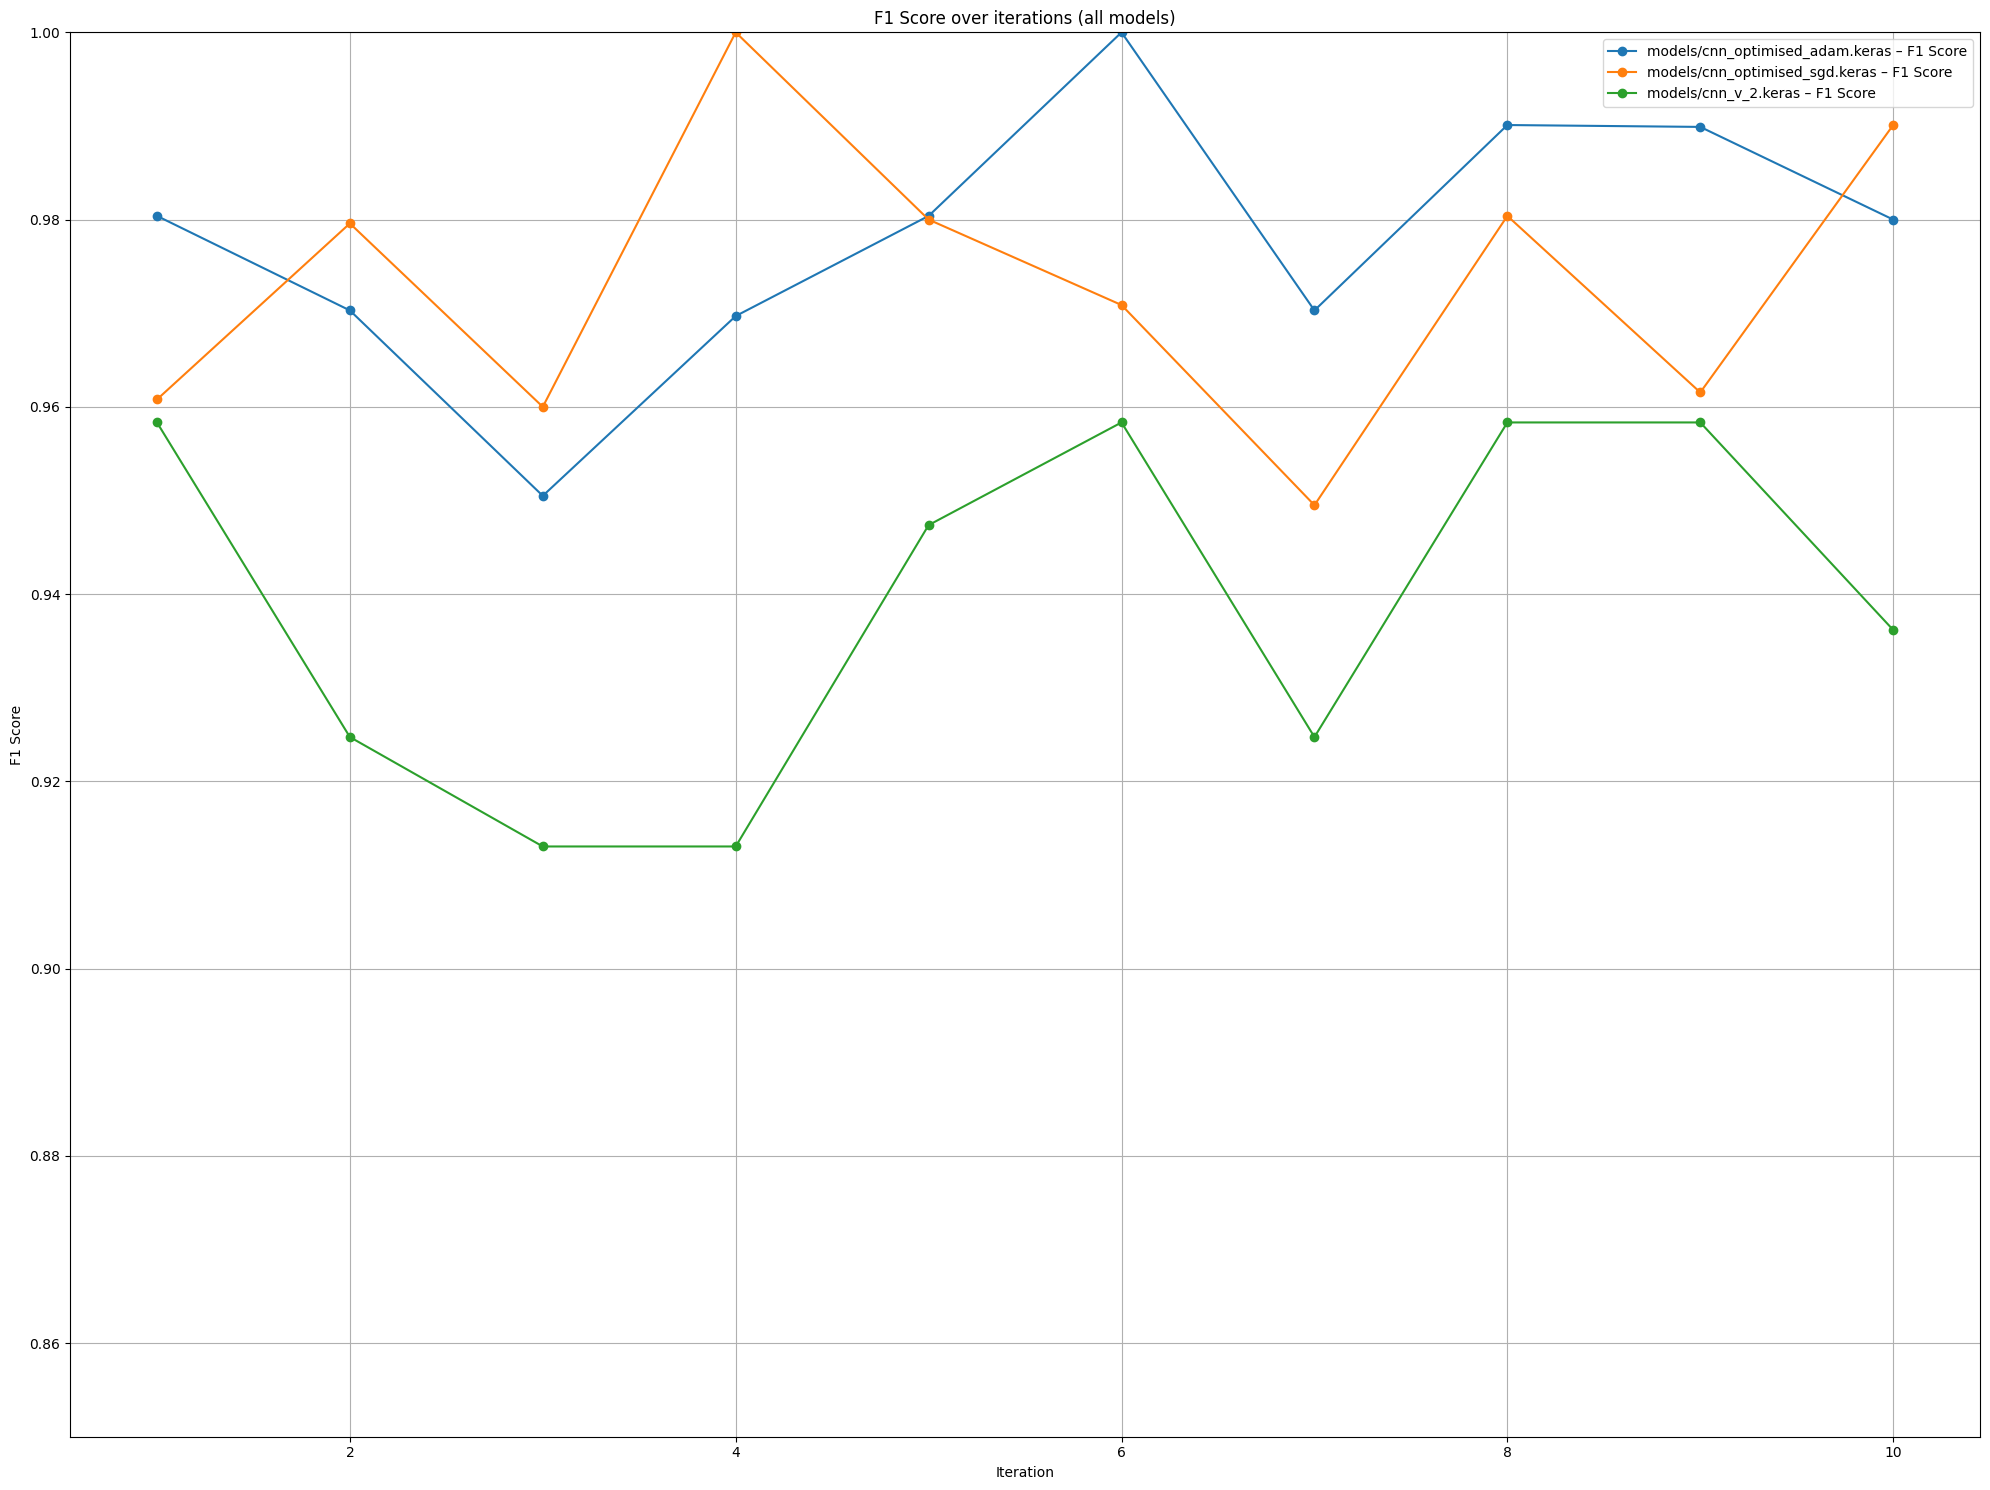

In [4]:
# Common x-axis for all models
iterations = list(range(1, n_iterations + 1))

# Accuracy plot
plt.figure(figsize=(20, 15))
for model_name, metrics in all_results.items():
    plt.plot(iterations, metrics["accuracy"], marker='o', label=f'{model_name} – Accuracy')
plt.ylim(.85, 1)
plt.title("Accuracy over iterations (all models)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# F1-score plot
plt.figure(figsize=(20, 15))
for model_name, metrics in all_results.items():
    plt.plot(iterations, metrics["f1"], marker='o', label=f'{model_name} – F1 Score')
plt.ylim(.85, 1)
plt.title("F1 Score over iterations (all models)")
plt.xlabel("Iteration")
plt.ylabel("F1 Score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ruegg\AppData\Local\Temp\ipykernel_67180\4279912160.py:24: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(
C:\Users\ruegg\AppData\Local\Temp\ipykernel_67180\4279912160.py:40: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(
C:\Users\ruegg\AppData\Local\Temp\ipykernel_67180\4279912160.py:40: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
C:\Users\ruegg\AppData\Local\Temp\ipykernel_67180\4279912160.py:40: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


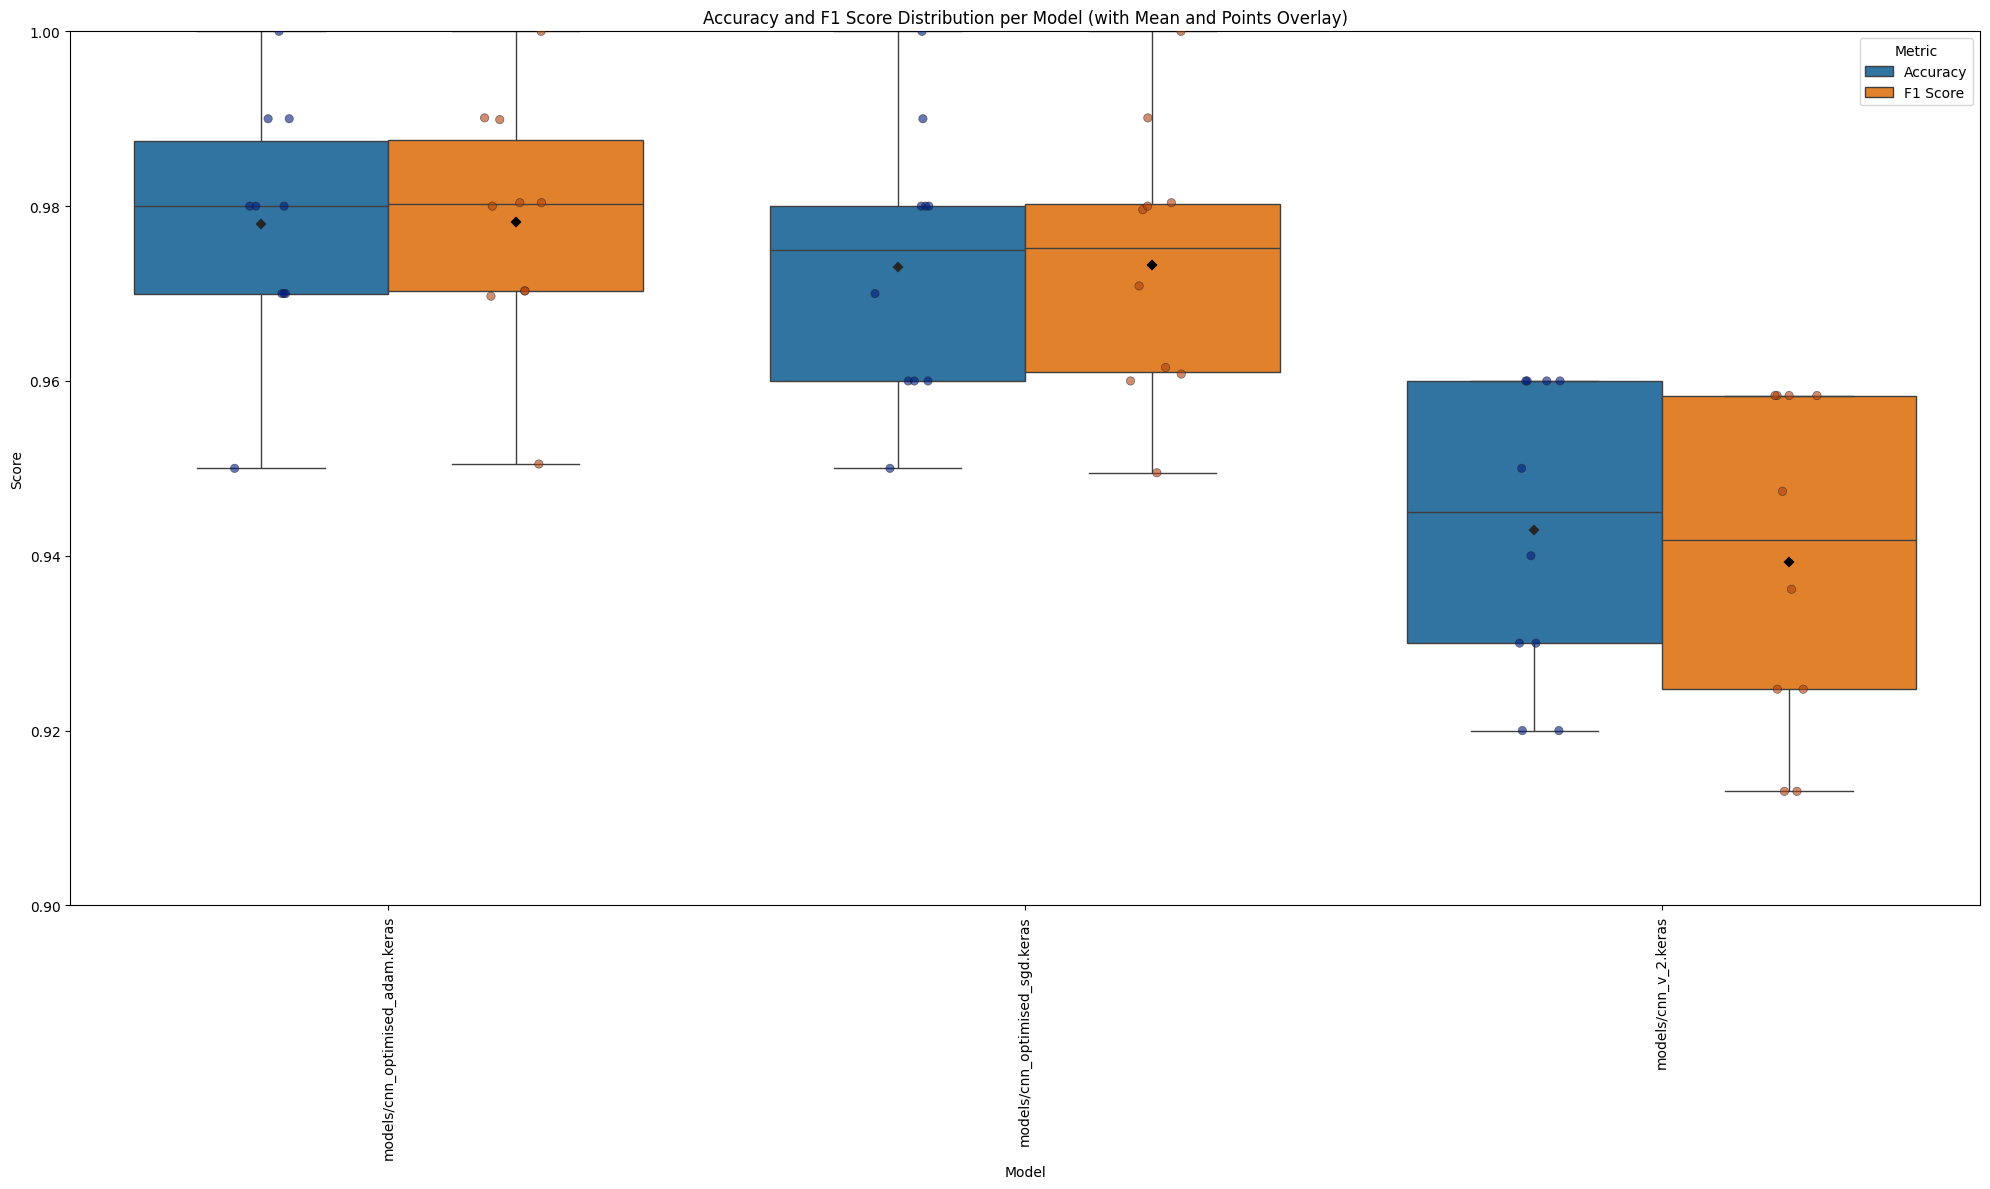

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for seaborn boxplot
accuracy_data = []
f1_data = []

for model_name, metrics in all_results.items():
    for acc in metrics["accuracy"]:
        accuracy_data.append({"Model": model_name, "Metric": "Accuracy", "Score": acc})
    for f1 in metrics["f1"]:
        f1_data.append({"Model": model_name, "Metric": "F1 Score", "Score": f1})

# Combine into one DataFrame
boxplot_data = pd.DataFrame(accuracy_data + f1_data)

plt.figure(figsize=(20, 12))

# Draw boxplot without fliers
sns.boxplot(data=boxplot_data, x="Model", y="Score", hue="Metric", showfliers=False)

# Overlay all data points (jittered)
sns.stripplot(
    data=boxplot_data,
    x="Model",
    y="Score",
    hue="Metric",
    dodge=True,
    jitter=True,
    alpha=0.6,
    size=6,
    edgecolor="gray",
    linewidth=0.5,
    palette="dark",
    legend=False
)

# Overlay mean values as diamonds
sns.pointplot(
    data=boxplot_data,
    x="Model",
    y="Score",
    hue="Metric",
    dodge=0.4,
    join=False,
    markers="D",
    color="black",
    scale=0.75,
    errorbar=None,
    legend=False  # Avoid duplicate legend
)

plt.xticks(rotation=90)
plt.title("Accuracy and F1 Score Distribution per Model (with Mean and Points Overlay)")
plt.ylim(0.9, 1)
plt.grid(False)
plt.tight_layout()
plt.show()


In [6]:
# Get indices for each class
idx_yes = np.where(y_data == 1)[0]
idx_no = np.where(y_data == 0)[0]



def annotate_and_save_image(image_array, filepath, true_label, pred_label, confidence, model_name):
    """Overlay text on image and save. Overwrites if file exists."""
    # Ensure parent directory exists
    filepath = Path(filepath)
    filepath.parent.mkdir(parents=True, exist_ok=True)

    # Prepare image
    img = (image_array * 255).astype(np.uint8)[..., ::-1]  # Convert to BGR for OpenCV
    annotated = img.copy()

    # Draw annotation
    label_text = f"Model: {model_name}\nTrue: {int(true_label)}\nPred: {int(pred_label)} ({confidence:.2f})"
    y0, dy = 30, 30
    for i, line in enumerate(label_text.split('\n')):
        y = y0 + i * dy
        cv2.putText(annotated, line, (10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Save image (overwrites by default)
    try:
        cv2.imwrite(str(filepath), annotated)
    except Exception as e:
        print(f"⚠️ Failed to save image to {filepath}: {e}")

import shutil
import os
import stat

def on_rm_error(func, path, exc_info):
    # Clear readonly attribute and retry
    os.chmod(path, stat.S_IWRITE)
    func(path)

output_dir = Path("misclassified_images")

if output_dir.exists() and output_dir.is_dir():
    shutil.rmtree(output_dir, onerror=on_rm_error)

output_dir.mkdir(parents=True, exist_ok=True)


for model_name in models_list:
    print(f"\n🔍 Evaluating model: {model_name}")
    model = load_model(model_name)
    model_id = Path(model_name).stem

    # Create folder for this model
    model_dir = output_dir / model_id
    (model_dir / "false_positive").mkdir(parents=True, exist_ok=True)
    (model_dir / "false_negative").mkdir(parents=True, exist_ok=True)

    accuracy_scores = []
    f1_scores = []


    selected_yes = idx_yes
    selected_no = idx_no
    selected_indices = np.concatenate([selected_yes, selected_no])
    np.random.shuffle(selected_indices)

    x_sample, y_sample = x_data[selected_indices], y_data[selected_indices]
    predictions = model.predict(x_sample)
    pred_labels = (predictions > 0.5).astype("int32").reshape(-1)

    for j, (true_label, pred_label, prob) in enumerate(zip(y_sample, pred_labels, predictions.flatten())):
        if true_label == 1 and pred_label == 0:
            # False Negative
            path = model_dir / "false_negative" / f"fn_iter{i+1}_{j}.png"
            annotate_and_save_image(x_sample[j], path, true_label, pred_label, prob, model_id)

        elif true_label == 0 and pred_label == 1:
            # False Positive
            path = model_dir / "false_positive" / f"fp_iter{i+1}_{j}.png"
            annotate_and_save_image(x_sample[j], path, true_label, pred_label, prob, model_id)




🔍 Evaluating model: models/cnn_optimised_adam.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step

🔍 Evaluating model: models/cnn_optimised_sgd.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 478ms/step

🔍 Evaluating model: models/cnn_v_2.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step
